# 한국어 처리 패키지 깔아보기 & 연습해보기
## WordCloud 사용해보기

konlpy라는 모듈 활용할 거임
https://konlpy.org/ko/latest/install/#id2
그냥 pip3 install konlpy만 하면 안되고,
자바 기반 모듈이기 때문에 설치 방법에 나와있는 데로 JDK 설치 및 JAVA_HOME 설정 들어가야 함
JAVA_HOME 설정은 저기 링크에 나와있는 것만 보고 하기는 약간 힘들고 window+R 에다가 control system 검색한다음 "고급 시스템 설정" --> "환경 변수" --> 시스템 변수에 변수 이름 "JAVA_HOME", 값 "C:\Program Files\Java\jdk1.8.0_241" 추가 --> PATH에 "C:\Program Files\Java\jdk1.8.0_241\bin" 추가

이유는 모르겠지만 jdk 가장 최신 버전이 14인데 14로 깔았을 때는 튕겼음
8버전으로 깔기 위해서는 오라클 회원가입이 필요함
https://www.oracle.com/java/technologies/javase-downloads.html
회원가입 하고 나서 여기서 깔기

그다음 JPype1 파일 설치해주는데, 얘도 그냥 pip install Jpype1로 깔면 터짐
https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
여기서 버전에 맞는거 찾은 다음
cmd 창으로 저 whl 경로까지 들어가서 pip install JPype1-0.7.2-~~~~ 해야 됨


In [20]:
#!pip3 install konlpy

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

In [3]:
#konlpy는 기본적으로 kolaw라고 법률 문서 한글로 제공해주는게 있음
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [4]:
c = kolaw.open("constitution.txt").read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [7]:
from konlpy.tag import *

In [8]:
okt = Okt()

In [9]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

wordcloud 모듈 깔아서 만들어보기

In [11]:
#!pip3 install wordcloud

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [31]:
#wc = WordCloud(width = 1000, height = 600, background_color = "white")

In [36]:
wc = WordCloud().generate(c)
wc.words_ # 자동으로 빈도 계산해서 보여줌

{'또는': 1.0,
 '있다': 0.8135593220338984,
 '법률이 정하는': 0.8135593220338984,
 '정하는 바에': 0.6271186440677966,
 '한다': 0.6101694915254238,
 '바에 의하여': 0.6101694915254238,
 '관한': 0.576271186440678,
 '때에는': 0.5084745762711864,
 '법률로 정한다': 0.4745762711864407,
 '모든 국민은': 0.3898305084745763,
 '의하여': 0.3559322033898305,
 '없다': 0.3559322033898305,
 '대통령은': 0.3220338983050847,
 '하며': 0.3050847457627119,
 '위하여': 0.2711864406779661,
 '이를': 0.2542372881355932,
 '아니한다': 0.23728813559322035,
 '사항은 법률로': 0.23728813559322035,
 '국회의': 0.22033898305084745,
 '국가는': 0.22033898305084745,
 '국회는': 0.22033898305084745,
 '국가의': 0.2033898305084746,
 '관하여': 0.2033898305084746,
 '다만': 0.1864406779661017,
 '의무를 진다': 0.1864406779661017,
 '대한': 0.1694915254237288,
 '권리를 가진다': 0.1694915254237288,
 '있어서': 0.15254237288135594,
 '과반수의': 0.15254237288135594,
 '헌법에 의하여': 0.15254237288135594,
 '필요한 사항은': 0.15254237288135594,
 '자유와': 0.13559322033898305,
 '가진다': 0.13559322033898305,
 '받은': 0.13559322033898305,
 '기타': 0.13559322033898

In [69]:
import numpy as np
from PIL import Image

In [78]:
mask = np.array(Image.open("음표.jpeg"))

In [79]:
data = c
wc = WordCloud(font_path = ".\korean_font.ttf", mask = mask,
               background_color = "white", max_words = 20000,
              max_font_size = 300).generate(c)
wc.to_file("test.png")

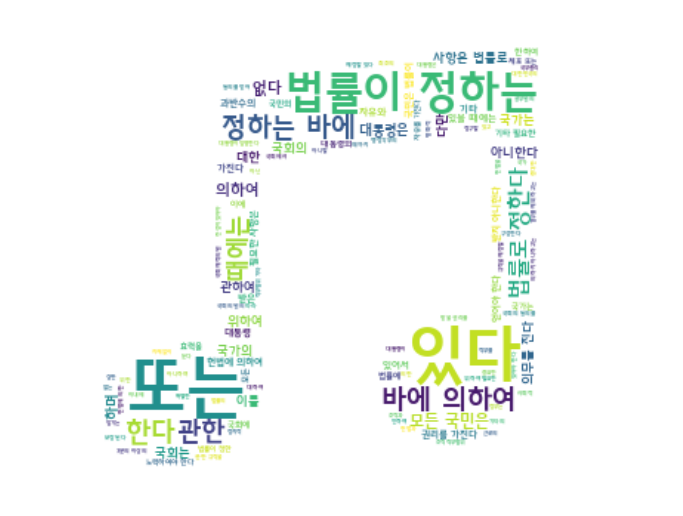

In [80]:
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()